# Logistic Regression

In this notebook, we will learn how to apply Logistic regression for predicting the cooling load requirements (Y2) of buildings as a function of building parameters (Xs).

The attached dataset is taken from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency).

To run this code, you will need the following python packages:
* numpy
* pandas
* openpyxl
* scikit-learn

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install openpyxl

In [3]:
# First, we load the dataset using pandas
df = pd.read_excel("Energy_Efficiency.xlsx", engine = 'openpyxl')
# Remove any unnamed columns (might occur due to difference in pandas readers)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Remove any row with NaNs
df = df.dropna(how='all')
# Drop Y1 (as we only consider Y2 for classification)
df = df.drop('Y1', axis=1)

In [4]:
# next, we will split the data frame into a training and testing splits with a 70% / 30% ratio
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42) # Random is fixed for reproducibility

In [5]:
df_train

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
334,0.62,808.5,367.5,220.50,3.5,4,0.25,1,15.77
139,0.64,784.0,343.0,220.50,3.5,5,0.10,2,19.30
485,0.90,563.5,318.5,122.50,7.0,3,0.25,5,32.00
547,0.79,637.0,343.0,147.00,7.0,5,0.40,1,46.94
18,0.79,637.0,343.0,147.00,7.0,4,0.00,0,30.93
...,...,...,...,...,...,...,...,...,...
71,0.76,661.5,416.5,122.50,7.0,5,0.10,1,33.67
106,0.86,588.0,294.0,147.00,7.0,4,0.10,2,27.36
270,0.71,710.5,269.5,220.50,3.5,4,0.10,5,14.26
435,0.98,514.5,294.0,110.25,7.0,5,0.25,4,30.12


In [6]:
df_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.760354,674.867784,318.636872,178.115456,5.201117,3.500931,0.235940,2.854749,24.287505
std,0.104790,87.758133,43.619254,44.839207,1.750948,1.106502,0.134118,1.544532,9.505775
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,10.940000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000,15.500000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000,21.160000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,32.920000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,48.030000


In [7]:
# Now we will extract the models input and targets from both the training and testing data frames
def extract_Xy(df):
    df_numpy = df.to_numpy()
    return df_numpy[:, :-1], df_numpy[:, -1]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)

y_median = np.median(y_train)
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the load is "high" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "low" (y = False)
y_train = y_train > y_median
y_test = y_test > y_median

# Now ~50% of the samples should be considered "high" and the rest are considered "low"
print(f"Percentage of 'high load' samples: {y_train.mean() * 100} %")

# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

Median value of the target: 21.16
Percentage of 'high load' samples: 49.906890130353815 %


### For The Normalization Step in the cell above 🔝
The mathematical equations behind the code for standardization (also known as z-score normalization) are relatively simple

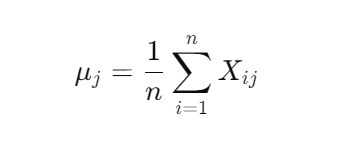

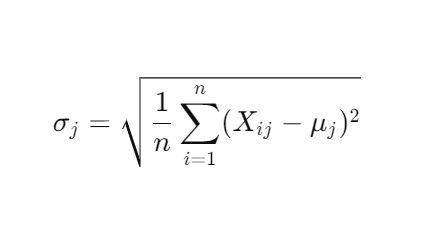

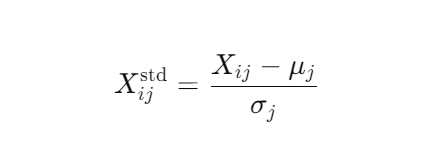

## Logistic Regression via Scikit-Learn

In [8]:
from sklearn.linear_model import LogisticRegression

In [11]:
%%time
# We use time to compute the training time of our model
model = LogisticRegression(random_state=0, penalty="none").fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 11 ms


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [12]:
from sklearn.metrics import accuracy_score

# Since it is Classification Problem we compute Accuracy :D
y_train_predict = model.predict(X_train)
print(f"Training Accurracy: {accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = model.predict(X_test)
print(f"Testing Accurracy: {accuracy_score(y_test, y_test_predict) * 100}%")

Training Accurracy: 98.32402234636871%
Testing Accurracy: 96.53679653679653%


## Logistic Regression from Scratch

In [26]:
def sigmoid(x):
    #TODO: Implement sigmoid (hint: use np.exp)
    # y= 1/(1+e^-x)
    y=1/(1+np.exp(-1*x))

    return y

In [14]:
# Sanity checks
print(f"{sigmoid(-1e2) = }") # This should be almost equal 0
print(f"{sigmoid(   0) = }") # This should be exactly 0.5
print(f"{sigmoid(+1e2) = }") # This should be almost equal 1

sigmoid(-1e2) = 3.7200759760208356e-44
sigmoid(   0) = 0.5
sigmoid(+1e2) = 1.0


In [15]:
def our_accuracy_score(true, predicted):
    #TODO: Implement an accuracy metric so that is can be used instead of Sklearn's accuracy score
    #Note: both true and predicted will be boolean numpy array

    # Accuracy metric to be using Total Correctly Classified Examples/ total no of Examples 😉
    # Count no of correctly classified Examples
    total_corrected=np.sum(true==predicted)

    accuracy=total_corrected/np.shape(true)[0]
    return accuracy

In [16]:
# Sanity checks
print(f"{our_accuracy_score( np.array([True,  True]), np.array([True,  True]) ) = }") # Should be 1
print(f"{our_accuracy_score( np.array([True, False]), np.array([True,  True]) ) = }") # Should be 0.5
print(f"{our_accuracy_score( np.array([True, False]), np.array([True, False]) ) = }") # Should be 1
print(f"{our_accuracy_score( np.array([False, True]), np.array([True, False]) ) = }") # Should be 0

our_accuracy_score( np.array([True,  True]), np.array([True,  True]) ) = 1.0
our_accuracy_score( np.array([True, False]), np.array([True,  True]) ) = 0.5
our_accuracy_score( np.array([True, False]), np.array([True, False]) ) = 1.0
our_accuracy_score( np.array([False, True]), np.array([True, False]) ) = 0.0


In [17]:
#IMPORTANT: You can only use numpy here. Do not use any pre-made algorithms (e.g. Scikit-Learn's Logistic Regression)
class OurLogisticRegression:
    def __init__(self, lr: int, epochs: int, probability_threshold: float = 0.5, random_state = None):
        self.lr = lr # The learning rate
        self.epochs = epochs # The number of training epochs
        self.probability_threshold = probability_threshold # If the output of the sigmoid function is > probability_threshold, the prediction is considered to be positive (True)
                                                           # otherwise, the prediction is considered to be negative (False)
        self.random_state = random_state # The random state will be used set the random seed for the sake of reproducibility
    
    def _prepare_input(self, X):
        # Here, we add a new input with value 1 to each example. It will be multiplied by the bias
        ones = np.ones((X.shape[0], 1), dtype=X.dtype)
        return np.concatenate((ones, X), axis=1)
    
    def _prepare_target(self, y):
        # Here, we convert True to +1 and False to -1
        #TODO (Optional): You can modify your function if you wish to used other values for the positive and negative classes

        # Convert True values to 1 and False values to -1
        return np.where(y, 1, -1)

    def _initialize(self, num_weights: int, stdev: float = 0.01):
        # Here, we initialize the weights using a normally distributed random variable with a small standard deviation
        self.w = np.random.randn(num_weights) * stdev

    def _gradient(self, X, y):
        #TODO: Compute and return the gradient of the weights (self.w) wrt to the loss given the X and y arrays

        # 1- sigmoid(x)= 1/(1+e^x)

        N = np.shape(X)[0]
        # Compute the dot product of W and X
        z=X@self.w # 409,1
        # Compute the logistic function of z
        sigma_z=y*z # 409,1

        # 1/(1+e^yWTX) = 1-sigmoid(yWTX)
        # 1-sigmoid(sigma_z)
        gradient_loss=(-1/N)*np.sum((y*X.T)*(1-sigmoid(sigma_z)),axis=1)  #(9,)

        return gradient_loss

    def _update(self, X, y):
        #TODO: Implement this function to apply a single iteration on the weights "self.w"
        #Hint: use self._gradient

        # Weight update Eq: w(t+1)=w(t)-lr * grad_w
        self.w=self.w - self.lr * self._gradient(X,y)
        return

    def fit(self, X, y):
        np.random.seed(self.random_state) # First, we set the seed
        X = self._prepare_input(X) # Then we prepare the inputs
        y = self._prepare_target(y) # and prepare the targets too
        self._initialize(X.shape[1]) # and initialize the weights randomly
        for _ in range(self.epochs): # Then we update the weights for a certain number of epochs
            self._update(X, y)
        return self # Return self to match the behavior of Scikit-Learn's LinearRegression fit()
    
    def predict(self, X):
        X = self._prepare_input(X)
        #TODO: Implement the rest of this function (Note: It should return a boolean array)

        # Eq: p(y|X)=sigmoid(WTX)
        sig=sigmoid(X@self.w)  #(batch_size,1) :D

        return sig>self.probability_threshold

In [18]:
# We will use this function to tune the hyper parameters
def validate(lr, epochs):
    validation_size = 0.3 #TODO: Choose a size for the validation set as a ratio from the training data
    X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)
    # We will fit the model to only a subset of the training data and we will use the rest to evaluate the performance
    our_model = OurLogisticRegression(lr=lr, epochs=epochs, random_state=0).fit(X_tr, y_tr)
    # Then, we evaluate the performance using the validation set
    return our_accuracy_score(y_val, our_model.predict(X_val)) 

In [19]:
lr =0.001 #None #TODO: Choose a learning rate to use while testing different values for the number of epochs
epochs_values = [2,10,50,100,500] #TODO: Choose a list of values for the number of epochs to test
for epochs in epochs_values:
    accuracy = validate(lr, epochs)
    print(f"In {epochs} epochs, the accuracy reaches {accuracy * 100}% using lr={lr}")

In 2 epochs, the accuracy reaches 18.51851851851852% using lr=0.001
In 10 epochs, the accuracy reaches 33.95061728395062% using lr=0.001
In 50 epochs, the accuracy reaches 98.76543209876543% using lr=0.001
In 100 epochs, the accuracy reaches 98.76543209876543% using lr=0.001
In 500 epochs, the accuracy reaches 98.76543209876543% using lr=0.001


### Notes
- It is clear in case 50,100,500 epochs we get same Accuracy this means that the model has reaches his best performance can't learn more from looping more on the same example  

In [21]:
epochs = 50 #TODO: Choose the number of epochs to use while testing different values for the learning rate
lr_values = [0.5,0.1,0.01,0.001,0.00001] #TODO: Choose a list of values for the learning rate to test
for lr in lr_values:
    accuracy = validate(lr, epochs)
    print(f"Using lr={lr}, the accuracy reaches {accuracy * 100}% in {epochs} epochs")

Using lr=0.5, the accuracy reaches 98.76543209876543% in 50 epochs
Using lr=0.1, the accuracy reaches 98.76543209876543% in 50 epochs
Using lr=0.01, the accuracy reaches 98.76543209876543% in 50 epochs
Using lr=0.001, the accuracy reaches 98.76543209876543% in 50 epochs
Using lr=1e-05, the accuracy reaches 17.901234567901234% in 50 epochs


### Notes:
- For very small learning rate 0.00001 we got very small accuracy because update rule is very small converging to thr local min


In [24]:
%%time
# We use time to compute the training time of our model
#TODO: Select an appropriate learning rate and number of epochs
lr = 0.001
epochs = 50
our_model = OurLogisticRegression(lr=lr, epochs=epochs, random_state=0).fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 4.01 ms


In [25]:
y_train_predict = our_model.predict(X_train)
print(f"Training Accuracy: {our_accuracy_score(y_train, y_train_predict) * 100}%")
y_test_predict = our_model.predict(X_test)
print(f"Testing Accuracy: {our_accuracy_score(y_test, y_test_predict) * 100}%")

Training Accuracy: 98.32402234636871%
Testing Accuracy: 96.53679653679653%


In [ ]:
#TODO: Write your conclusion about your implementation's performance and training time


Scikit-Learn:
```
    CPU times: total: 0 ns
    Wall time: 11 ms

    Training Accurracy: 98.32402234636871%
    Testing Accurracy: 96.53679653679653%
```

Our Logistic Regression: [lr 0.001 50 Epoch]
```
    CPU times: total: 15.6 ms
    Wall time: 4.01 ms
    
    Training Accuracy: 98.32402234636871%
    Testing Accuracy: 96.53679653679653%

```


We Achieved Same Accuracy as Scikit-Learn but we have more execution time 

# Bonus

As a bonus, you can implement and test the following:
* Stochastic gradient descent
* Termination conditions (e.g. The gradient check)
  
Write your conclusion about any results you calculate for your bonus implementations.

**IMPORTANT**: Do not implement the bonus in the previous cells. You can copy and paste codes from the previous cells and continue your implementation below this cell.

## Stochastic Gradient Descent

In [65]:
#IMPORTANT: You can only use numpy here. Do not use any pre-made algorithms (e.g. Scikit-Learn's Logistic Regression)
class OurLogisticRegressionSGD:
    def __init__(self, lr: int, epochs: int, probability_threshold: float = 0.5, random_state = None,convergence_tol = None):
        self.lr = lr # The learning rate
        self.epochs = epochs # The number of training epochs
        self.probability_threshold = probability_threshold # If the output of the sigmoid function is > probability_threshold, the prediction is considered to be positive (True)
                                                           # otherwise, the prediction is considered to be negative (False)
        self.random_state = random_state # The random state will be used set the random seed for the sake of reproducibility


        # Converge Condition between losses of 2 successive epochs
        self.convergence_tol = convergence_tol
    
    def _prepare_input(self, X):
        # Here, we add a new input with value 1 to each example. It will be multiplied by the bias
        ones = np.ones((X.shape[0], 1), dtype=X.dtype)
        return np.concatenate((ones, X), axis=1)
    
    def _prepare_target(self, y):
        # Here, we convert True to +1 and False to -1
        #TODO (Optional): You can modify your function if you wish to used other values for the positive and negative classes

        # Convert True values to 1 and False values to -1
        return np.where(y, 1, -1)

    def _initialize(self, num_weights: int, stdev: float = 0.01):
        # Here, we initialize the weights using a normally distributed random variable with a small standard deviation
        self.w = np.random.randn(num_weights) * stdev

    def _stochastic_gradient(self, X, y):
        #TODO: Compute and return the gradient of the weights (self.w) wrt to the loss given the X and y arrays

        # 1- sigmoid(x)= 1/(1+e^x)

        # Compute the dot product of W and X
        z=X@self.w # 1,1
        # Compute the logistic function of z
        sigma_z=y*z # 1,1

        # # 1/(1+e^yWTX) = 1-sigmoid(yWTX)
        # # 1-sigmoid(sigma_z)
        gradient_loss=-1*(y*X.T)*(1-sigmoid(sigma_z))  #(9,)

        return gradient_loss

    def _update(self, X, y):
        #TODO: Implement this function to apply a single iteration on the weights "self.w"
        #Hint: use self._gradient
        N=X.shape[0]

        # Shuffle the dataset
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(N):
            # UPDATE Weights With Every Training Example
            # Weight update Eq: w(t+1)=w(t)-lr * grad_w
            self.w=self.w - self.lr * self._stochastic_gradient(X_shuffled[i],y_shuffled[i])

        return

    def fit(self, X, y):
        np.random.seed(self.random_state) # First, we set the seed
        X = self._prepare_input(X) # Then we prepare the inputs
        y = self._prepare_target(y) # and prepare the targets too
        self._initialize(X.shape[1]) # and initialize the weights randomly



        prev_loss = np.inf 
        for epoch in range(self.epochs): # Then we update the weights for a certain number of epochs
            self._update(X, y)

            if self.convergence_tol:
                # Calculate the loss for the current epoch
                current_loss = self._loss(X, y)
                # Check for convergence: stop if the change in loss is below the tolerance
                if np.abs(current_loss - prev_loss) < self.convergence_tol:
                    print(f"Convergence reached at epoch {epoch + 1}")
                    break

                prev_loss = current_loss  # Update previous loss for the next iteration


        return self # Return self to match the behavior of Scikit-Learn's LinearRegression fit()
    
    def predict(self, X):
        X = self._prepare_input(X)
        #TODO: Implement the rest of this function (Note: It should return a boolean array)

        # Eq: p(y|X)=sigmoid(WTX)
        sig=sigmoid(X@self.w)  #(batch_size,1) :D

        return sig>self.probability_threshold
    

    def _loss(self, X, y):
        # Calculate the raw scores (logits)
        z = X @ self.w
        # Apply the sigmoid function to obtain probabilities
        prob = sigmoid(z)
        # Calculate the binary cross-entropy loss
        loss = -np.mean(y * np.log(prob) + (1 - y) * np.log(1 - prob))
        return loss

In [66]:
%%time
# We use time to compute the training time of our model
#TODO: Select an appropriate learning rate and number of epochs
lr = 0.001
epochs = 50
our_model_SGD = OurLogisticRegressionSGD(lr=lr, epochs=epochs, random_state=0,convergence_tol = None).fit(X_train, y_train)

CPU times: total: 266 ms
Wall time: 272 ms


In [67]:
y_train_predict_SGD = our_model_SGD.predict(X_train)
print(f"Training Accuracy: {our_accuracy_score(y_train, y_train_predict_SGD) * 100}%")
y_test_predict_SGD = our_model_SGD.predict(X_test)
print(f"Testing Accuracy: {our_accuracy_score(y_test, y_test_predict_SGD) * 100}%")

Training Accuracy: 98.32402234636871%
Testing Accuracy: 96.53679653679653%


In [70]:
%%time
# We use time to compute the training time of our model
#TODO: Select an appropriate learning rate and number of epochs
lr = 0.001
epochs = 50
our_model_SGD = OurLogisticRegressionSGD(lr=lr, epochs=epochs, random_state=0,convergence_tol = 1e-1).fit(X_train, y_train)

Convergence reached at epoch 6
CPU times: total: 62.5 ms
Wall time: 61 ms


In [71]:
y_train_predict_SGD = our_model_SGD.predict(X_train)
print(f"Training Accuracy: {our_accuracy_score(y_train, y_train_predict_SGD) * 100}%")
y_test_predict_SGD = our_model_SGD.predict(X_test)
print(f"Testing Accuracy: {our_accuracy_score(y_test, y_test_predict_SGD) * 100}%")

Training Accuracy: 98.32402234636871%
Testing Accuracy: 96.53679653679653%


### Notes
- Same Accuracy is reached but Longer Time I think this is due to updating with every one example so More Steps are required for Converge Since Weight is adjusted based on one example at a time so adjusting it to one example may cause it is to misclassify previously adjusted examples
- The in between Solution is Mini- Batch Gradient Descent

Without Early Stopping
```
CPU times: total: 266 ms
Wall time: 272 ms
```
After Adding Early Stopping by checking on loss 
```
Convergence reached at epoch 6
CPU times: total: 31.2 ms
Wall time: 33 ms
```


#### Reduction in Time 😋 with same accuracy 